## Experiment No.2 :  Treating Outliers 
### Name : Vighnesh Babasaheb Sankpal.
### Roll No. 10.

### Importing Required Libraries.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data =pd.DataFrame( {'value': [86,90,58,12, 49,-200,77,15,91,29,20,0,14,250,76,50,65,18,56,36,58]} )
data.head()

,value
0,86
1,90
2,58
3,12
4,49


### Detect outliers:
    techniques:
    1. scatterplot, pair plot 
    2. box plot 
    3. IQR 
    4. z-score 
    5. normal distribution 

### 1. ScatterPlot 

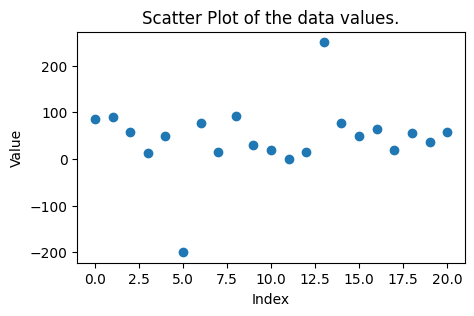

In [3]:
fig,ax = plt.subplots(figsize=(5,3));
x_values = np.arange(len(data));
ax.scatter(x_values,data);
ax.set_xlabel("Index");
ax.set_ylabel("Value");
ax.set_title("Scatter Plot of the data values.");


### 2. Box Plot 

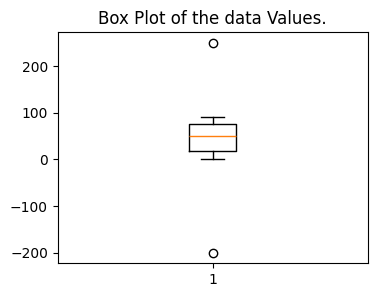

In [4]:
fig,ax = plt.subplots(figsize=(4,3));
ax.boxplot(data);
ax.set_title("Box Plot of the data Values.");

### 3. IQR

In [5]:
def calculate_IQR(data):
    q1= np.quantile(data,0.25)
    q2 = np.median(data)
    q3= np.quantile(data,0.75)
    iqr = q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    return {'q1':q1,
            'median':q2,
            'q3':q3,
            'iqr':iqr,
            'lower_bound':lower_bound,
            'upper_bound':upper_bound}



In [6]:
iqr_values = calculate_IQR(data)

    
print(f"Lower Bound = {iqr_values['lower_bound']}")
print(f"Q1 = {iqr_values['q1']}")
print(f"Media = {iqr_values['median']}")
print(f"Q3 = {iqr_values['q3']}")
print(f"IQR = {iqr_values['iqr']}")
print(f"Upper Bound = {iqr_values['upper_bound']}")

Lower Bound = -69.0
Q1 = 18.0
Media = 50.0
Q3 = 76.0
IQR = 58.0
Upper Bound = 163.0


### 4. Z-Score

In [7]:
mean = np.mean(data['value'])
std = np.std(data['value'])
threshold = 2.5
outliers = []
for x in data['value']:
    z_score = (x-mean)/std
    if np.abs(z_score)> threshold:
        outliers.append(x)
print(outliers)    

[-200, 250]


### 5. Distribution

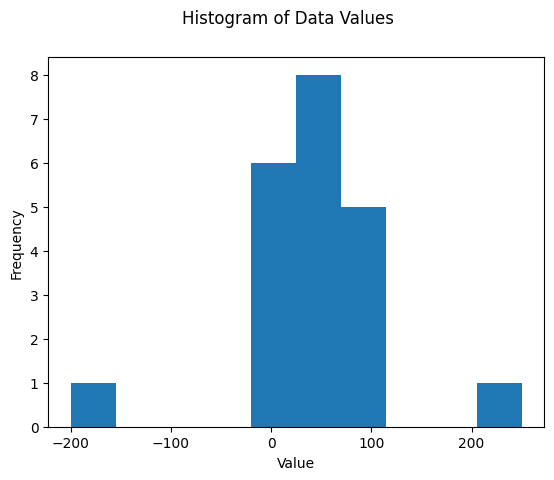

In [8]:
plt.hist(data['value']);
plt.xlabel("Value");
plt.ylabel("Frequency");
plt.suptitle('Histogram of Data Values') ;

## Treating of outliers: 
Techniques:
1. Inter Quantile Range (IQR)
2. Z-Score method 

### 1. Inter Quantile Range (IQR)

In [9]:
iqr_values = calculate_IQR(data['value'])
no_outliers=[]
for x in data['value']:
    if (x<iqr_values['upper_bound'] and x>iqr_values['lower_bound']):
        no_outliers.append(x)

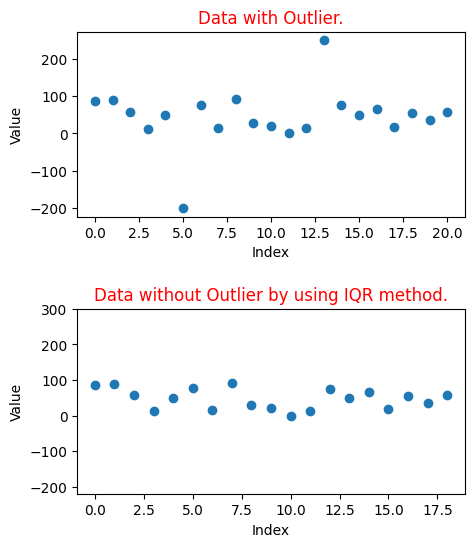

In [10]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,6));
fig.subplots_adjust(hspace=0.5) 

x1_index = np.arange(len(data));
x2_index = np.arange(len(no_outliers));

ax1.scatter(x1_index,data);
ax2.scatter(x2_index,no_outliers);
plt.ylim((-220,300));

ax1.set_title("Data with Outlier.",color='red')
ax2.set_title("Data without Outlier by using IQR method.",color='red')
for ax in  [ax1,ax2]:
    ax.set_ylabel("Value")
    ax.set_xlabel("Index")
    



### 2. Z-score Method

In [11]:
mean = np.mean(data['value'])
std = np.std(data['value'])
threshold = 2.5
no_outliers=[]

for x in data['value']:
    z_score = (x-mean)/std
    if np.abs(z_score)< threshold:
        no_outliers.append(x)


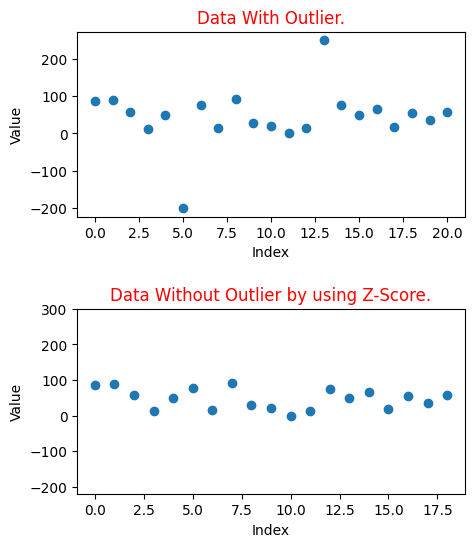

In [12]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,6));
fig.subplots_adjust(hspace=0.5) 

x1_index = np.arange(len(data));
x2_index = np.arange(len(no_outliers));

ax1.scatter(x1_index,data);
ax2.scatter(x2_index,no_outliers);
plt.ylim((-220,300));

ax1.set_title("Data With Outlier.",color='red')
ax2.set_title("Data Without Outlier by using Z-Score.",color='red')
for ax in  [ax1,ax2]:
    ax.set_ylabel("Value")
    ax.set_xlabel("Index")
    

